# Clustering Lab  

##### From Introduction to Statistical Learning

## K-Means clustering  
  
  The function `kmeans()` performs K-means clustering in `R`. We'll begin with a simple simulated example in which there truly are two clusters in the data: The first 25 observations have a mean shift relative to the next 25 observations.  

In [3]:
set.seed(2)
x <- matrix(rnorm(100), ncol=2)
x[1:25,1] <- x[1:25,1] + 3
x[1:25,2] <- x[1:25,2] - 4

Now we perform K-means clustering with $K=2$.

In [4]:
km.out <- kmeans(x, 2, nstart=20)

The cluster assignments of the 50 observations are contained in `km.out$cluster`.

In [5]:
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [6]:
sum(km.out$cluster == 1)

[1] 25

The K-means clustering perfectly separated the observations into two clusuters even though we didn't supply any group information to the function. We can plot the data, with each observation colored according to its cluster assignment.

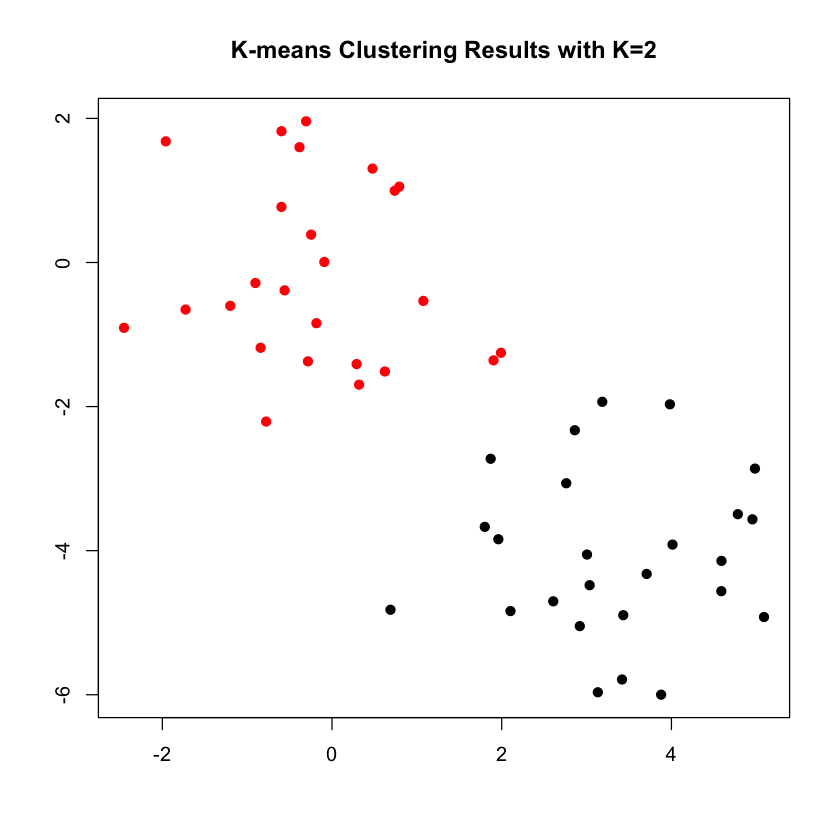

In [12]:
plot(x, col=(km.out$cluster), main='K-means Clustering Results with K=2', xlab='', ylab='', pch=20, cex=1.5)

Here the observations can easily be plotted because they are two dimensional. If there were more than two variables, we could perform PCA and plot the first two principal components score vectors.  
  
  In this example, we knew that there really were two clusters (because we generated the data to be that way). For real data, we don't generally know the true number of clusters. We could instead have performed K-means clustering on this data with $K=3$.

In [13]:
set.seed(4)
km.out <- kmeans(x, 3, nstart=20)
km.out

K-means clustering with 3 clusters of sizes 17, 23, 10

Cluster means:
        [,1]        [,2]
1  3.7789567 -4.56200798
2 -0.3820397 -0.08740753
3  2.3001545 -2.69622023

Clustering vector:
 [1] 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 3 2 3 2 2 2 2

Within cluster sum of squares by cluster:
[1] 25.74089 52.67700 19.56137
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

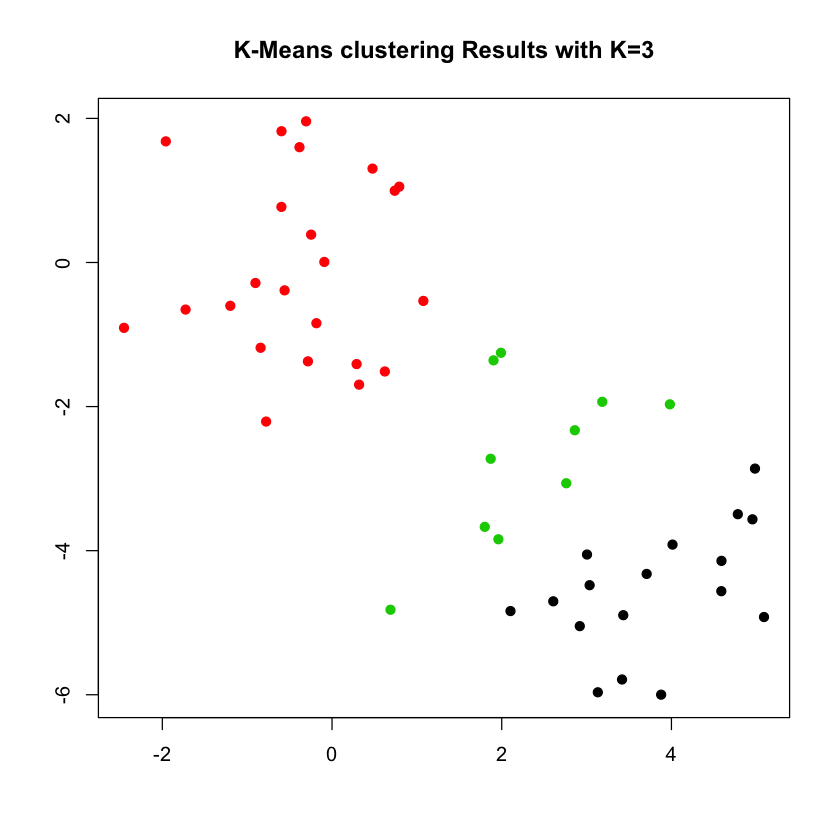

In [14]:
plot(x, col=km.out$cluster, main='K-Means clustering Results with K=3', xlab='', ylab='', pch=20, cex=1.5)

To run the `kmeans()` function ini `R` with multiple initial cluster assignments, we use the `nstart` argument. If a value of `nstart` greater than one is used, then K-means clustering will be performed using multiple random initial cluster assignments, and the `kmeans()` function will report only the best results. Next we compare using `nstart=1` to `nstart=20`.

In [18]:
set.seed(138)
km.out <- kmeans(x, 3, nstart=1)
km.out$tot.withinss

[1] 98.16736

In [19]:
km.out <- kmeans(x, 3, nstart=20)
km.out$tot.withinss

[1] 97.97927

Note that `km.outu$tot.withinss` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering. The individual within-cluster sum of squares are contained in the vector `km.out$withinss`.  
  
  It is *strongly* recommeded to always run K-means clustering with a large value of `nstart`, such as 20 or 50, since otherwise an undesirable local minimum may be obtained.  
  
  When performing K-means clusutering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `set.seed()` function so that the K-means output will be reproducible.

#  
  
  

## Hierarchical Clustering  
  
  The `hclust()` function implements hierarchical clustering in `R`. In the following example we use data from section 10.5.1 of ISLR to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure.  
  
  We begin by clustering observations using complete linkage. The `dist()` function is used to compute the 50 x 50 inter-observation Euclidean distance matrix.

In [20]:
hc.complete <- hclust(dist(x), method='complete')

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [21]:
hc.average <- hclust(dist(x), method='average')
hc.single <- hclust(dist(x), method='single')

Now we can plot the dendrograms obtained using the usual `plot()` function. The numbers at the bottom of the plot identify each observation.

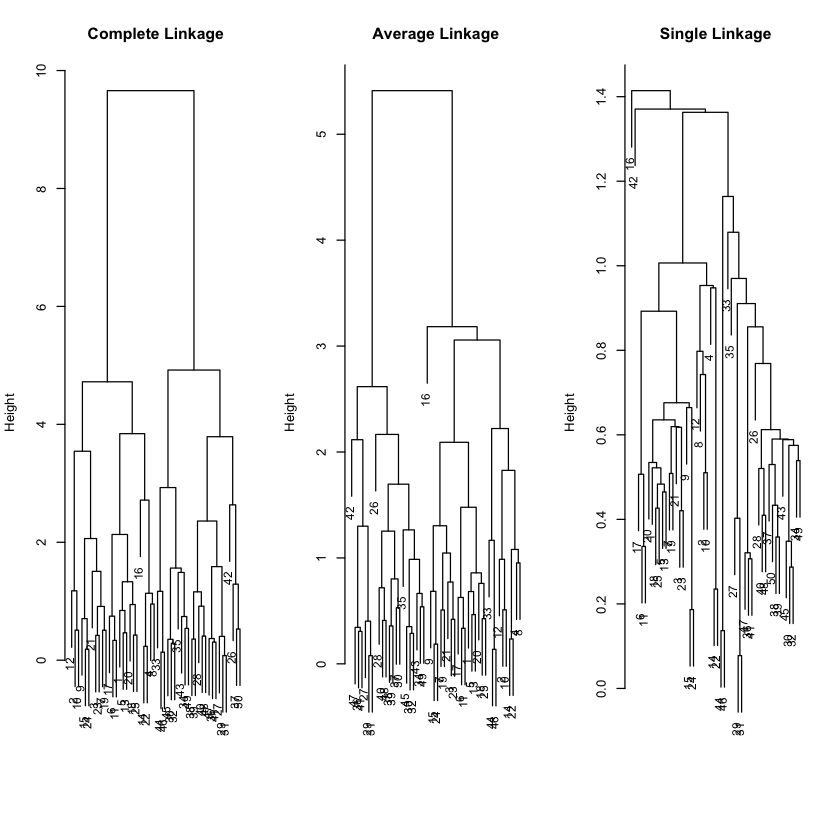

In [25]:
par(mfrow=c(1, 3))
plot(hc.complete, main='Complete Linkage', xlab='', sub='', cex=0.9)
plot(hc.average, main='Average Linkage', xlab='', sub='', cex=0.9)
plot(hc.single, main='Single Linkage', xlab='', sub='', cex=0.9)

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `cutree()` function:

In [26]:
cutree(hc.complete, 3)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 3 3 3 3 2 2 2
[39] 2 2 2 2 3 3 3 3 2 2 3 2

In [27]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [28]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [29]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

For this particular data, the complete and average linkage generally separate the observations into their correct groups. Single linkage, on the other hand, identifies one point as belonging to its own cluster with all the others in a separate cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons.

In [30]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

To scale the variables before performing hierarchical clustering of observations, we use the `scale()` function:

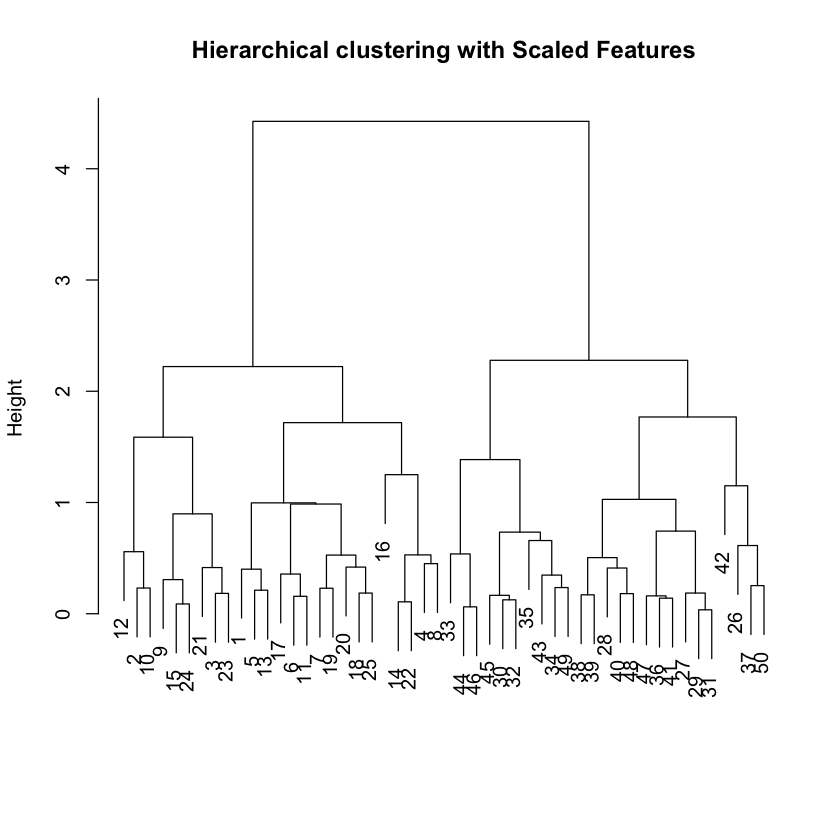

In [33]:
x.scale <- scale(x)
scaled.clust <- hclust(dist(x.scale), method='complete')
plot(scaled.clust, main='Hierarchical clustering with Scaled Features', xlab='', sub='')

In [35]:
cutree(scaled.clust, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [38]:
mean(cutree(scaled.clust, 2) == cutree(hc.complete, 2)) # Leads to same results in this case

[1] 1

Correlation-based distance can be computed using the `as.dist()` function, which converts an arbitrary square symmetric matrix into a form that the `hclust()` function recognizes as a distance matrix. However, this only makes sense for data with at least thrhee features since the absolute correlation between any two observations with measurements on two features is always 1. Hence, we will cluster a three dimensional data set.

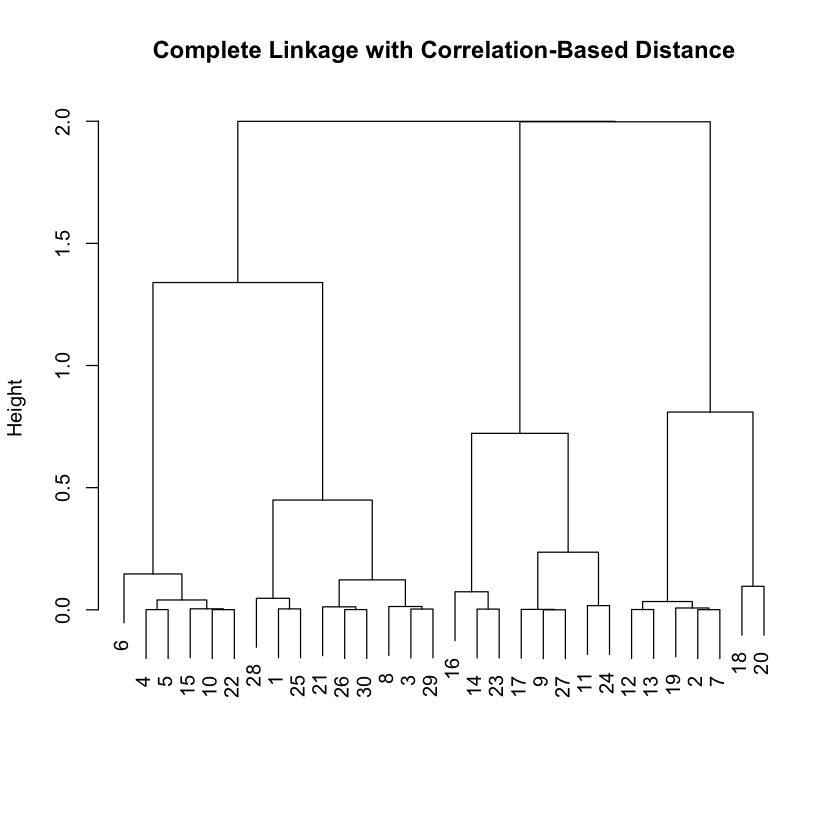

In [39]:
x <- matrix(rnorm(30*3), ncol=3)
dd <- as.dist(1-cor(t(x)))
plot(hclust(dd, method='complete'), main='Complete Linkage with Correlation-Based Distance', xlab='', sub='')